In [1]:
import pandas as pd 
path = 'https://raw.githubusercontent.com/lab30041954/Data/main/'
df = pd.read_csv(path + 'pcos.csv', index_col = 0)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 1 to 541
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pcos         538 non-null    int64  
 1   age          538 non-null    int64  
 2   weight       538 non-null    float64
 3   height       538 non-null    float64
 4   blood        538 non-null    int64  
 5   pulse        538 non-null    int64  
 6   rr           538 non-null    int64  
 7   hb           538 non-null    float64
 8   cycle        538 non-null    int64  
 9   cyclelen     538 non-null    int64  
 10  marriage     538 non-null    float64
 11  pregnant     538 non-null    int64  
 12  abortions    538 non-null    int64  
 13  beta_hcg1    538 non-null    float64
 14  beta_hcg2    538 non-null    float64
 15  fsh          538 non-null    float64
 16  lh           538 non-null    float64
 17  hip          538 non-null    int64  
 18  waist        538 non-null    int64  
 19  tsh          

In [ ]:
round(df['pcos'].mean(), 3)

np.float64(0.327)

In [5]:
y = df['pcos']
X1 = df.drop(columns = ['blood', 'pcos'])

In [6]:
X2 = pd.get_dummies(df['blood'])
X2.columns

Index([11, 12, 13, 14, 15, 16, 17, 18], dtype='int64')

In [7]:
X2.columns = ['A+', 'A-', 'B+', 'B-', 'O+', 'O-', 'AB+', 'AB-']


In [8]:
X = pd.concat([X1, X2], axis = 1)

In [10]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5) 
clf.fit(X,y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [11]:
round(clf.score(X,y), 3)

0.937

In [12]:
y_pred = clf.predict(X) 
from sklearn.metrics import confusion_matrix 
confusion_matrix(y,y_pred)

array([[357,   5],
       [ 29, 147]])

In [14]:
importance = pd.Series(clf.feature_importances_, index = X.columns)
importance[importance> 0].sort_values(ascending = False).round(3)

rfollicle      0.442
hair_growth    0.109
weight_gain    0.099
lfollicle      0.084
cyclelen       0.059
amh            0.041
lsize          0.036
lh             0.030
weight         0.023
endometrium    0.020
fastfood       0.019
beta_hcg1      0.017
waist          0.013
fsh            0.007
dtype: float64

In [15]:
X['bmi'] = df['weight']/df['height']**2 
X['lh_fsh'] = df['lh']/df['fsh'] 
X['hip_waist'] = df['hip']/df['waist']

In [16]:
clf.fit(X,y)
round(clf.score(X,y),3)

0.942

In [17]:
importance = pd.Series(clf.feature_importances_, index = X.columns)
importance[importance > 0].sort_values(ascending = False).round(3)

rfollicle      0.430
hair_growth    0.106
weight_gain    0.096
lfollicle      0.081
lh_fsh         0.046
amh            0.040
lsize          0.035
weight         0.024
cyclelen       0.024
endometrium    0.019
fastfood       0.019
beta_hcg1      0.017
bmi            0.015
fsh            0.014
age            0.012
lh             0.012
rbs            0.009
dtype: float64

In [19]:
from sklearn.model_selection import cross_val_score 
cross_val_score(clf, X, y, cv = 3).round(3)

array([0.856, 0.743, 0.855])

In [20]:
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X,y) 
round(clf.score(X,y),3)

0.931

In [21]:
cross_val_score(clf,X,y, cv=3).round(3)

array([0.839, 0.749, 0.832])

In [22]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 6)
clf.fit(X,y) 
round(clf.score(X,y), 3)

0.859

In [23]:
importance = pd.Series(clf.feature_importances_, index = X.columns)
importance[importance > 0].sort_values(ascending = False).round(3)

rfollicle      0.613
weight_gain    0.149
hair_growth    0.120
amh            0.061
lfollicle      0.057
dtype: float64

In [24]:
cross_val_score(clf, X, y, cv = 3).round(3)

array([0.828, 0.821, 0.81 ])

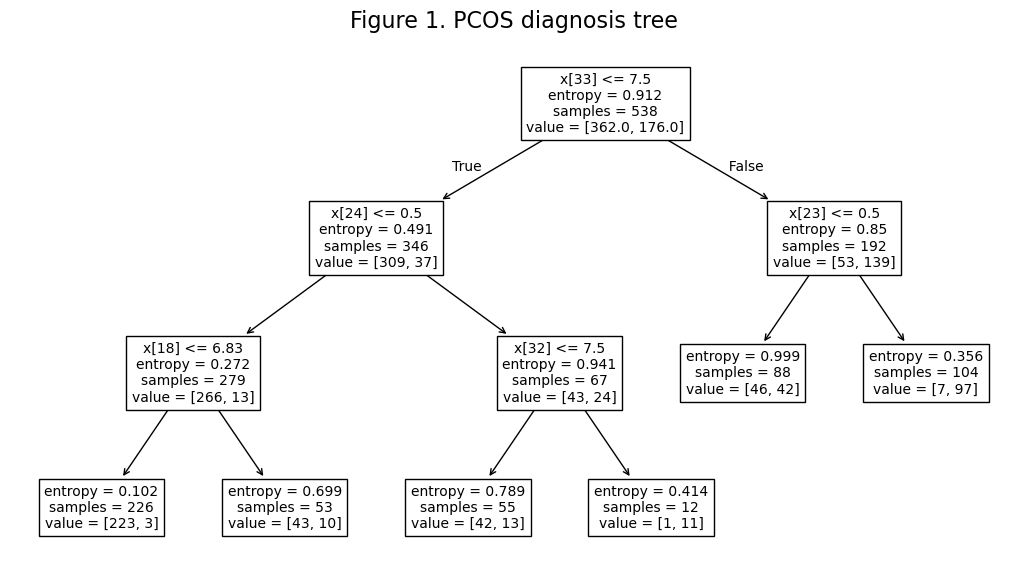

In [29]:
from matplotlib import pyplot as plt 
from sklearn.tree import plot_tree 
plt.figure(figsize = (13,7))
plot_tree(clf, fontsize = 10) 
plt.title('Figure 1. PCOS diagnosis tree', fontsize = 16);

In [30]:
y_pred = clf.predict(X)
confusion_matrix(y,y_pred)


array([[354,   8],
       [ 68, 108]])